# Credit Card Users Churn Prediction

## Problem Statement

### Adam Fraser

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy

import os
import tempfile

from sklearn.impute import KNNImputer, SimpleImputer

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, InputLayer
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import Recall

from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# To ignore unnecessary warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore', category=DataConversionWarning) 
warnings.filterwarnings(action='ignore', category=FutureWarning)

## Loading the dataset

In [2]:
bank_df = pd.read_csv("BankChurners.csv")
#pd.set_option('display.max_columns', 80)  # or 1000

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Data Overview

- Observations
- Sanity checks

In [3]:
# Get number of rows and columns
bank_df.shape

(10127, 21)

In [4]:
# Let's take a quick look. 
bank_df.head(20) 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
# Get some quantitative stats and supress scientific notation
bank_df.describe().T.apply(lambda x: x.apply('{0:.2f}'.format))

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00,739177606.33,36903783.45,708082083.00,713036770.50,717926358.00,773143533.00,828343083.00
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00


In [7]:
# Check for duplicates -> No duplicates
bank_df.duplicated().value_counts()

False    10127
dtype: int64

In [8]:
# Where do I have nulls or missing values
bank_df.isna().sum(axis = 0)

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [9]:
bank_df['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [10]:
bank_df['Gender'].value_counts(normalize=True)

F    0.529081
M    0.470919
Name: Gender, dtype: float64

In [11]:
bank_df['Education_Level'].value_counts(normalize=True)

Graduate         0.363383
High School      0.233852
Uneducated       0.172746
College          0.117681
Post-Graduate    0.059944
Doctorate        0.052393
Name: Education_Level, dtype: float64

In [12]:
bank_df['Marital_Status'].value_counts(normalize=True)

Married     0.499787
Single      0.420452
Divorced    0.079761
Name: Marital_Status, dtype: float64

In [13]:
bank_df['Income_Category'].value_counts(normalize=True)

Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
abc               0.109805
$120K +           0.071788
Name: Income_Category, dtype: float64

In [14]:
bank_df['Card_Category'].value_counts(normalize=True)

Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64

### Observations
* 84% of the customers are Existing vs 16% Attrited.
* `Age` look reasonable in their range (26-73) with a mean of 46
* `Gender` percentages are close (53% Female vs 47% Male).
* No super big families, 5 dependents is the max.  Some with no dependents.
* Nulls exist, but over 50% of customers have college or high school degrees. Only about 11% of the customers have a Post-Graduate or Doctorate degree.  College students make up 12% of the customer base.
* Three types of `Marital_Status`: Married (50%), Single (42%), Divorced (8%).  Missing some values though.
* Ranges of Income, but a strange value of 'abc'that makes up about 11% of the data.  **Will need to address.** ✅
* Most customers have Blue `Card_Category` (93%).  The three other categories are less than 7%, Platinum is < 1%.
* `Months_on_book` looks reasonable in their range (13-56 months) with a mean of 36 months
* `Total_Relationship_Count` looks reasonable in the range of 1-6 with the mean of ~4 products.  Is it important to know what those products are?
* `Months_Inactive_12_mon` looks reasonable in the range of 0-6 months with mean of ~2 months.
* `Contacts_Count_12_mon` looks reasonable in the range of 0-6 months with mean of ~2.5 months.
* `Credit_Limit` looks reasonable in the range of \\$1400-\\$34,000 with mean of ~\\$8,600.  **Need to look at distribution** ✅
* `Total_Revolving_Bal` are relatively small with max ~\\$2500.
* `Avg_Open_To_Buy` max should not be bigger than max credit limit and it isn't.  Interesting that `Credit Limit` max == `Avg_Open_To_Buy` max.  This means the individual(s) with the max credit limit don't actually use their credit card.  
* `Total_Amt_Chng_Q4_Q1` - Assume this is a ratio of some sorts where Q4/Q1 so values should be more and less than one, but not negative.  That is the case. I guess the case for when Q1 is zero is simply handled as 0.0.
* `Total_Trans_Amt` ranges from \\$500 to \\$18000. **Need to look at distribution** ✅
* `Total_Trans_Ct` ranges from 10-139 with a mean of ~65 transactions. **Need to look at distribution** ✅
* `Total_Ct_Chng_Q4_Q1` - Assume this is a ratio of some sorts where Q4/Q1 so values should be more and less than one, but not negative.  That is the case. I guess the case for when Q1 is zero is simply handled as 0.0.
* `Avg_Utilization_Ratio` has no values greater than 1. **Need to look at distribution** ✅
* `Education_Level` and `Marital_Status` are the only variables **with missing values.** ✅

## Exploratory Data Analysis (EDA)

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to plot a two countplots side by side.


def countplot_sbs(df1, df2, feature):
        
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 5), sharey=True)

    #target_uniq = data[target].unique()
    total_df1 = len(df1[feature]) - df1[feature].isna().sum(axis = 0) # length of the column
    total_df2 = len(df2[feature])
    
    
    axs[0].set_title("Original Distribution")
    ax1 = sns.countplot(
        data=df1,
        x=feature,
        palette="Paired",
        ax=axs[0],
        #stat='percent'
        order=df1[feature].value_counts().index[:].sort_values(),
    )

    for p in ax1.patches:
        label = "{:.1f}%".format(
                100 * p.get_height() / total_df1
        )  # percentage of each class of the category
        
        #label = p.get_height()  # count of each level of the category
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax1.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=8,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentagehe percentage
    
    
    axs[1].set_title("Imputed Distribution")
    ax2 = sns.countplot(
        data=df2,
        x=feature,
        palette="Paired",
        ax=axs[1],
        #stat='percent'
        order=df2[feature].value_counts().index[:].sort_values(),
    )
    
    for p in ax2.patches:
        label = "{:.1f}%".format(
               100 * p.get_height() / total_df2
        )  # percentage of each class of the category
        #label = p.get_height()  # count of each level of the category
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax2.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=8,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentagehe percentage
    
    plt.tight_layout()
    plt.setp(ax1.get_xticklabels() + ax2.get_xticklabels(), rotation=30, ha='right')
    plt.show()
    
    
    

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [18]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [19]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Exploratory Data Analysis Instructions.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### Questions

**Ans: U-shaped distribution that is right-skewed with many outliers.**

**Ans: Like I said above, Nulls exist, but over 50% of customers have college or high school degrees. Only about 11% of the customers have a Post-Graduate or Doctorate degree. College students make up 12% of the customer base.**

**Ans: The real distribution is difficult to determine because of the 'abc' category in the data.  However, if we just use the data in the graph, must customers make less than \\$40K. The other catogories are close with over $120K noticably smaller.**

**Ans: `Total_Ct_Chng_Q4_Q1` in general is smaller for Attrited Customers. Existing customers have more outliers (though it also has many more data points).**

**Ans: Most attrited customers go 2-3 months without using their card in 12 months where as existing customers go 1-3 months. This seems to confirm the idea that customers who use their cards stay customers).**

**Ans:**
* **'Months_on_book' and 'Customer_Age'(.79),**
* **'Average_Utilization' and 'Total_Revolving_Bal' (.62),**
* **'Total_Trans_Amt' and 'Total_Trans_Ct' (.81)**

#### Additional EDA

**Observations:**
* **'Total_Trans_Amt' and 'Total_Trans_Ct' very much have a boundary where Attrited individuals do not venture**
* **'Total_Revolving_Bal' also seems to have some separation for lower Attrited individuals**

**Distributions look similar.  Of course the ratio of Existing to Attrited is rather large 
so count values are less important.  Interesting spikes and valleys in the graphs.**

**Again, distributions look similar.  Notice the spike at the max is present in both 'Attribution_Flag' categories.  Lots of outliers for both categories.**

**Normal distribution for both categories.  Once again pretty good alignment around the medians and quartiles.**

**Similar u-shaped histograms for both categories.  This time their isn't the alignment for the quartiles like we've seen.**

**U-shaped distribution for Existing, but not for Attrited.  Again, their isn't the alignment for the quartiles like we've seen.**

**Similar distributions with Existing being more gradual.  Big decline for Attrited when ration gets even slightly away from 0.0.  Again, their isn't the alignment for the quartiles like we've seen. Lots of Attrited don't appear to use their cards**

**Attrited have less number of products.  Customers who don't leave have many products.**

**Attrited customers keep their balances down (if they have a balance that revolves).**  

## Data Pre-processing

**Let's check and see if the data is clean per the the formula mentioned above.**

In [20]:
# Evaluation must take into account float values.
bank_df[(bank_df['Avg_Open_To_Buy'] / bank_df['Credit_Limit'] + bank_df['Avg_Utilization_Ratio'] < .99) & 
        (bank_df['Avg_Open_To_Buy'] / bank_df['Credit_Limit'] + bank_df['Avg_Utilization_Ratio']) > 1.00009].shape

(0, 21)

**Formula seems to hold for the data.**

**Fix `Attrition_Flag`.**

In [21]:
new_label = {'Attrition_Flag': {'Attrited Customer': 1, 'Existing Customer': 0}}
bank_df.replace(new_label, inplace=True)
bank_df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [22]:
neg, pos = np.bincount(bank_df['Attrition_Flag'])
total = neg + pos

**Drop `Gender`.**

In [23]:
bank_df.drop(['Gender'], axis=1, inplace=True)

**Drop `CLIENTNUM`. It is unnecessary.**

In [24]:
bank_df.drop(['CLIENTNUM'], axis=1, inplace=True)

## Missing value imputation and Dataset Creation




In [25]:
bank_df.drop(['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], axis=1, inplace=True)

In [26]:
# One last check
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Months_on_book            10127 non-null  int64  
 4   Total_Relationship_Count  10127 non-null  int64  
 5   Months_Inactive_12_mon    10127 non-null  int64  
 6   Contacts_Count_12_mon     10127 non-null  int64  
 7   Credit_Limit              10127 non-null  float64
 8   Total_Revolving_Bal       10127 non-null  int64  
 9   Avg_Open_To_Buy           10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 11  Total_Trans_Amt           10127 non-null  int64  
 12  Total_Trans_Ct            10127 non-null  int64  
 13  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 14  Avg_Ut

In [27]:
# independant variables
X = bank_df.drop(['Attrition_Flag'], axis=1)

# the dependent variable
y = bank_df[['Attrition_Flag']]

In [28]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(5063, 14) (3038, 14) (2026, 14)
(5063, 1) (3038, 1) (2026, 1)


In [29]:
# Get y_train as a np array and then create a boolean version
y_train_ar = np.array(y_train['Attrition_Flag'])
bool_y_train = y_train_ar != 0

**Check to see if our different datasets maintain the distribution of attrition.**

In [30]:
print(f'Average class probability in training set: % .4f' %y_train.mean())
print(f'Average class probability in validation set: % .4f' %y_val.mean())
print(f'Average class probability in test  % .4f' %y_test.mean())

print(type(X_train))

Average class probability in training set:  0.1606
Average class probability in validation set:  0.1606
Average class probability in test   0.1609
<class 'pandas.core.frame.DataFrame'>


**Normalize the data.**

In [31]:
#Z-score Normalizing
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_val = preprocessing.scale(X_val)
X_test = preprocessing.scale(X_test)

**Deal with outliers.**

In [32]:
X_train = np.clip(X_train, -5, 5)
X_val = np.clip(X_val, -5, 5)
X_test = np.clip(X_test, -5, 5)

**Quick look to see that our data shaping worked.  We should see distros centered at 0 and in the range of -5 or 5.**

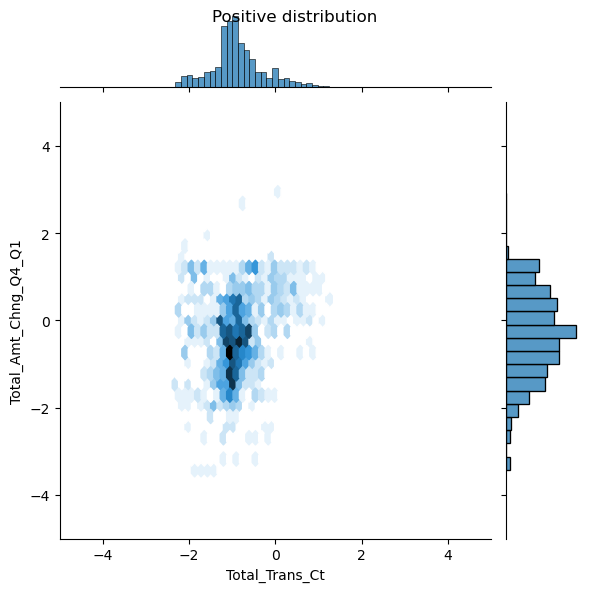

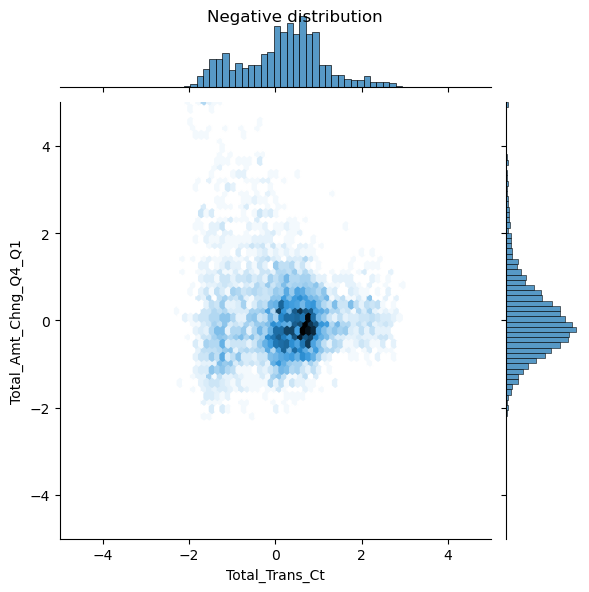

In [33]:
pos_df = pd.DataFrame(X_train[bool_y_train], columns=X.columns)
neg_df = pd.DataFrame(X_train[~bool_y_train], columns=X.columns)

sns.jointplot(x=pos_df['Total_Trans_Ct'], y=pos_df['Total_Amt_Chng_Q4_Q1'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['Total_Trans_Ct'], y=neg_df['Total_Amt_Chng_Q4_Q1'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

## Model Building

**Metrics of interest plus a function to create a model.  The model is a simple neural network with a densly connected hidden layer, a [dropout](https://developers.google.com/machine-learning/glossary/#dropout_regularization) layer to reduce overfitting, and an output sigmoid layer that returns the probability of a customer departing.**

In [34]:
METRICS = [
      tf.keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
      tf.keras.metrics.MeanSquaredError(name='Brier score'),
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(
          16, activation='relu',
          input_shape=(X_train.shape[-1],)),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
      loss=tf.keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

**Now create and train your model using the function that was defined earlier. Notice that the model is fit using a larger than default batch size of 2048, this is important to ensure that each batch has a decent chance of containing a few positive samples. If the batch size was too small, they would likely have no fraudulent transactions to learn from.**


**Note: Fitting this model will not handle the class imbalance efficiently. You will improve it later in this tutorial.**

In [35]:
EPOCHS = 100
BATCH_SIZE = 512

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [36]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Initial Bias

**Simple test run of the model.**

In [37]:
model.predict(X_train[:8])

1/1 [==============================] - 0s 72ms/step


array([[0.29429442],
       [0.15500385],
       [0.2873292 ],
       [0.40990108],
       [0.48384622],
       [0.39892542],
       [0.4207629 ],
       [0.25876626]], dtype=float32)

These initial guesses are not great. You know the dataset is imbalanced. Set the output layer's bias to reflect that, see [A Recipe for Training Neural Networks: "init well"](http://karpathy.github.io/2019/04/25/recipe/#2-set-up-the-end-to-end-trainingevaluation-skeleton--get-dumb-baselines). This can help with initial convergence.

With the default bias initialization the loss should be about `math.log(2) = 0.69314` ***????????***

In [38]:
results = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0])) ## THIS IS NOT THE 0.69314 ABOVE.  WHY?

Loss: 0.7959


The correct bias to set can be derived from:

$$ p_0 = pos/(pos + neg) = 1/(1+e^{-b_0}) $$
$$ b_0 = -log_e(1/p_0 - 1) $$
$$ b_0 = log_e(pos/neg)$$

In [39]:
initial_bias = np.log([pos/neg])
initial_bias

array([-1.65332834])

Set that as the initial bias, and the model will give much more reasonable initial guesses. 

It should be near: `pos/total = 0.1607`

In [40]:
model = make_model(output_bias=initial_bias)
model.predict(X_train[:8])

1/1 [==============================] - 0s 19ms/step


array([[0.04464932],
       [0.05201925],
       [0.1049118 ],
       [0.11193893],
       [0.38782716],
       [0.23295133],
       [0.2058657 ],
       [0.16918322]], dtype=float32)

**This is occuring -- see 0.1433044 is close to the 0.1607.**

With this initialization the initial loss should be approximately:

$$-p_0log(p_0)-(1-p_0)log(1-p_0) = 0.4408$$

In [41]:
results = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.5139


This is happening as well.  The new loss of 0.4496 is close to the 0.4408.

This way the model doesn't need to spend the first few epochs just learning that positive examples are unlikely. It also makes it easier to read plots of the loss during training.

## Save initial weights and check for improved model

In [42]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [43]:
# No initial bias
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_val, y_val), 
    verbose=0)

In [44]:
# With initial bias
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_val, y_val), 
    verbose=0)

In [45]:
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [46]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

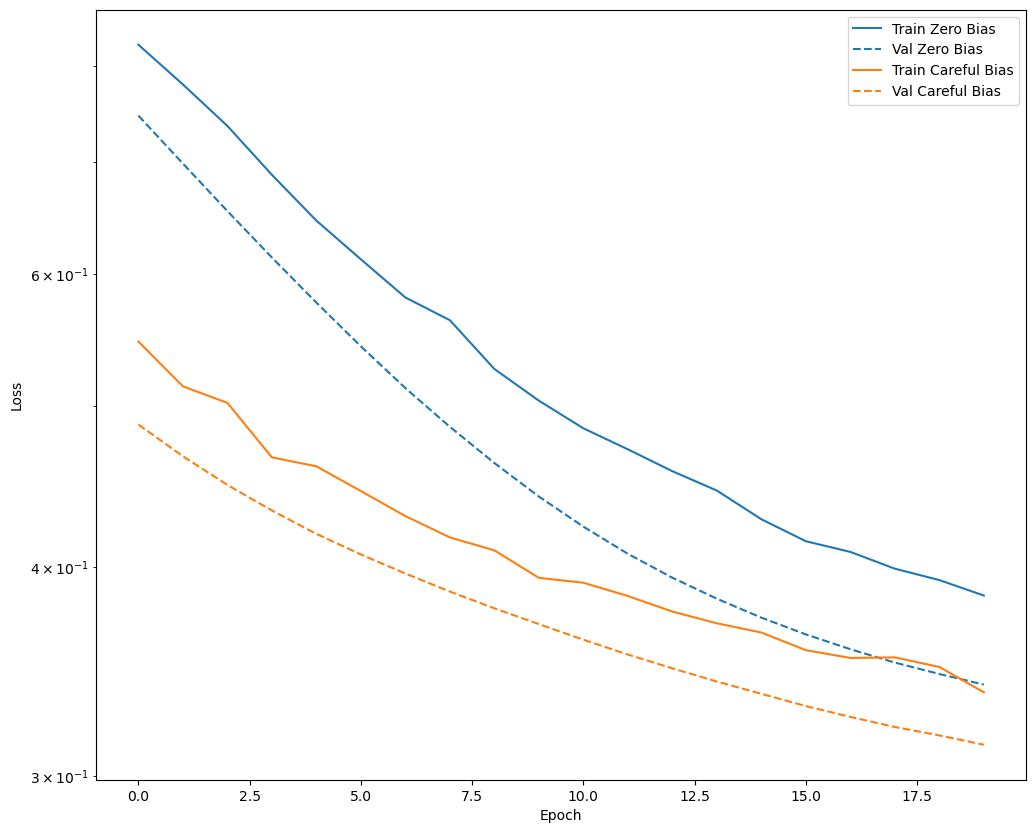

In [47]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

The above figure makes it clear: In terms of validation loss, on this problem, this careful initialization gives a clear advantage. 

## Train the Model

In [48]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val, y_val))

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 0.5396 - cross entropy: 0.4547 - Brier score: 0.1423 - tp: 97.0000 - fp: 331.0000 - tn: 6469.0000 - fn: 1204.0000 - accuracy: 0.8105 - precision: 0.2266 - recall: 0.0746 - auc: 0.6623 - prc: 0.2386 - val_loss: 0.4874 - val_cross entropy: 0.4874 - val_Brier score: 0.1567 - val_tp: 1.0000 - val_fp: 132.0000 - val_tn: 2418.0000 - val_fn: 487.0000 - val_accuracy: 0.7962 - val_precision: 0.0075 - val_recall: 0.0020 - val_auc: 0.5523 - val_prc: 0.1623
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5080 - cross entropy: 0.5080 - Brier score: 0.1598 - tp: 14.0000 - fp: 242.0000 - tn: 4008.0000 - fn: 799.0000 - accuracy: 0.7944 - precision: 0.0547 - recall: 0.0172 - auc: 0.5317 - prc: 0.1613 - val_loss: 0.4669 - val_cross entropy: 0.4669 - val_Brier score: 0.1490 - val_tp: 1.0000 - val_fp: 92.0000 - val_tn: 2458.0000 - val_fn: 487.0000 - val_accuracy: 0.8094 - val_precision: 0.0108 - val_recall

Epoch 17/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3618 - cross entropy: 0.3618 - Brier score: 0.1110 - tp: 146.0000 - fp: 60.0000 - tn: 4190.0000 - fn: 667.0000 - accuracy: 0.8564 - precision: 0.7087 - recall: 0.1796 - auc: 0.7868 - prc: 0.4594 - val_loss: 0.3256 - val_cross entropy: 0.3256 - val_Brier score: 0.0988 - val_tp: 42.0000 - val_fp: 1.0000 - val_tn: 2549.0000 - val_fn: 446.0000 - val_accuracy: 0.8529 - val_precision: 0.9767 - val_recall: 0.0861 - val_auc: 0.8605 - val_prc: 0.6659
Epoch 18/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3557 - cross entropy: 0.3557 - Brier score: 0.1085 - tp: 175.0000 - fp: 83.0000 - tn: 4167.0000 - fn: 638.0000 - accuracy: 0.8576 - precision: 0.6783 - recall: 0.2153 - auc: 0.7994 - prc: 0.4873 - val_loss: 0.3215 - val_cross entropy: 0.3215 - val_Brier score: 0.0973 - val_tp: 54.0000 - val_fp: 3.0000 - val_tn: 2547.0000 - val_fn: 434.0000 - val_accuracy: 0.8562 - val_precision: 0.9474 - val_recall:

Epoch 33/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3116 - cross entropy: 0.3116 - Brier score: 0.0951 - tp: 258.0000 - fp: 104.0000 - tn: 4146.0000 - fn: 555.0000 - accuracy: 0.8698 - precision: 0.7127 - recall: 0.3173 - auc: 0.8576 - prc: 0.5951 - val_loss: 0.2812 - val_cross entropy: 0.2812 - val_Brier score: 0.0831 - val_tp: 180.0000 - val_fp: 25.0000 - val_tn: 2525.0000 - val_fn: 308.0000 - val_accuracy: 0.8904 - val_precision: 0.8780 - val_recall: 0.3689 - val_auc: 0.8896 - val_prc: 0.7182
Epoch 34/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3045 - cross entropy: 0.3045 - Brier score: 0.0922 - tp: 268.0000 - fp: 86.0000 - tn: 4164.0000 - fn: 545.0000 - accuracy: 0.8754 - precision: 0.7571 - recall: 0.3296 - auc: 0.8655 - prc: 0.6128 - val_loss: 0.2794 - val_cross entropy: 0.2794 - val_Brier score: 0.0826 - val_tp: 183.0000 - val_fp: 26.0000 - val_tn: 2524.0000 - val_fn: 305.0000 - val_accuracy: 0.8910 - val_precision: 0.8756 - val_re

Epoch 49/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2910 - cross entropy: 0.2910 - Brier score: 0.0883 - tp: 315.0000 - fp: 124.0000 - tn: 4126.0000 - fn: 498.0000 - accuracy: 0.8771 - precision: 0.7175 - recall: 0.3875 - auc: 0.8807 - prc: 0.6346 - val_loss: 0.2618 - val_cross entropy: 0.2618 - val_Brier score: 0.0773 - val_tp: 227.0000 - val_fp: 38.0000 - val_tn: 2512.0000 - val_fn: 261.0000 - val_accuracy: 0.9016 - val_precision: 0.8566 - val_recall: 0.4652 - val_auc: 0.9038 - val_prc: 0.7383
Epoch 50/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2861 - cross entropy: 0.2861 - Brier score: 0.0875 - tp: 299.0000 - fp: 119.0000 - tn: 4131.0000 - fn: 514.0000 - accuracy: 0.8750 - precision: 0.7153 - recall: 0.3678 - auc: 0.8863 - prc: 0.6494 - val_loss: 0.2612 - val_cross entropy: 0.2612 - val_Brier score: 0.0772 - val_tp: 227.0000 - val_fp: 37.0000 - val_tn: 2513.0000 - val_fn: 261.0000 - val_accuracy: 0.9019 - val_precision: 0.8598 - val_r

Epoch 65/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2734 - cross entropy: 0.2734 - Brier score: 0.0833 - tp: 344.0000 - fp: 120.0000 - tn: 4130.0000 - fn: 469.0000 - accuracy: 0.8837 - precision: 0.7414 - recall: 0.4231 - auc: 0.8982 - prc: 0.6747 - val_loss: 0.2489 - val_cross entropy: 0.2489 - val_Brier score: 0.0740 - val_tp: 235.0000 - val_fp: 38.0000 - val_tn: 2512.0000 - val_fn: 253.0000 - val_accuracy: 0.9042 - val_precision: 0.8608 - val_recall: 0.4816 - val_auc: 0.9157 - val_prc: 0.7561
Epoch 66/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2710 - cross entropy: 0.2710 - Brier score: 0.0836 - tp: 326.0000 - fp: 113.0000 - tn: 4137.0000 - fn: 487.0000 - accuracy: 0.8815 - precision: 0.7426 - recall: 0.4010 - auc: 0.8995 - prc: 0.6772 - val_loss: 0.2480 - val_cross entropy: 0.2480 - val_Brier score: 0.0738 - val_tp: 235.0000 - val_fp: 38.0000 - val_tn: 2512.0000 - val_fn: 253.0000 - val_accuracy: 0.9042 - val_precision: 0.8608 - val_r

Epoch 81/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2625 - cross entropy: 0.2625 - Brier score: 0.0808 - tp: 362.0000 - fp: 124.0000 - tn: 4126.0000 - fn: 451.0000 - accuracy: 0.8864 - precision: 0.7449 - recall: 0.4453 - auc: 0.9082 - prc: 0.6931 - val_loss: 0.2366 - val_cross entropy: 0.2366 - val_Brier score: 0.0707 - val_tp: 243.0000 - val_fp: 43.0000 - val_tn: 2507.0000 - val_fn: 245.0000 - val_accuracy: 0.9052 - val_precision: 0.8497 - val_recall: 0.4980 - val_auc: 0.9260 - val_prc: 0.7728
Epoch 82/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2557 - cross entropy: 0.2557 - Brier score: 0.0785 - tp: 360.0000 - fp: 118.0000 - tn: 4132.0000 - fn: 453.0000 - accuracy: 0.8872 - precision: 0.7531 - recall: 0.4428 - auc: 0.9145 - prc: 0.7090 - val_loss: 0.2359 - val_cross entropy: 0.2359 - val_Brier score: 0.0705 - val_tp: 245.0000 - val_fp: 44.0000 - val_tn: 2506.0000 - val_fn: 243.0000 - val_accuracy: 0.9055 - val_precision: 0.8478 - val_r

Epoch 97/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2490 - cross entropy: 0.2490 - Brier score: 0.0766 - tp: 386.0000 - fp: 120.0000 - tn: 4130.0000 - fn: 427.0000 - accuracy: 0.8920 - precision: 0.7628 - recall: 0.4748 - auc: 0.9201 - prc: 0.7213 - val_loss: 0.2255 - val_cross entropy: 0.2255 - val_Brier score: 0.0678 - val_tp: 258.0000 - val_fp: 47.0000 - val_tn: 2503.0000 - val_fn: 230.0000 - val_accuracy: 0.9088 - val_precision: 0.8459 - val_recall: 0.5287 - val_auc: 0.9345 - val_prc: 0.7874
Epoch 98/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2481 - cross entropy: 0.2481 - Brier score: 0.0755 - tp: 384.0000 - fp: 114.0000 - tn: 4136.0000 - fn: 429.0000 - accuracy: 0.8928 - precision: 0.7711 - recall: 0.4723 - auc: 0.9206 - prc: 0.7224 - val_loss: 0.2249 - val_cross entropy: 0.2249 - val_Brier score: 0.0676 - val_tp: 259.0000 - val_fp: 47.0000 - val_tn: 2503.0000 - val_fn: 229.0000 - val_accuracy: 0.9092 - val_precision: 0.8464 - val_r

### Check training history

In this section, you will produce plots of your model's accuracy and loss on the training and validation set. These are useful to check for overfitting, which you can learn more about in the [Overfit and underfit](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit) tutorial.

Additionally, you can produce these plots for any of the metrics you created above. False negatives are included as an example.

In [49]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+ metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

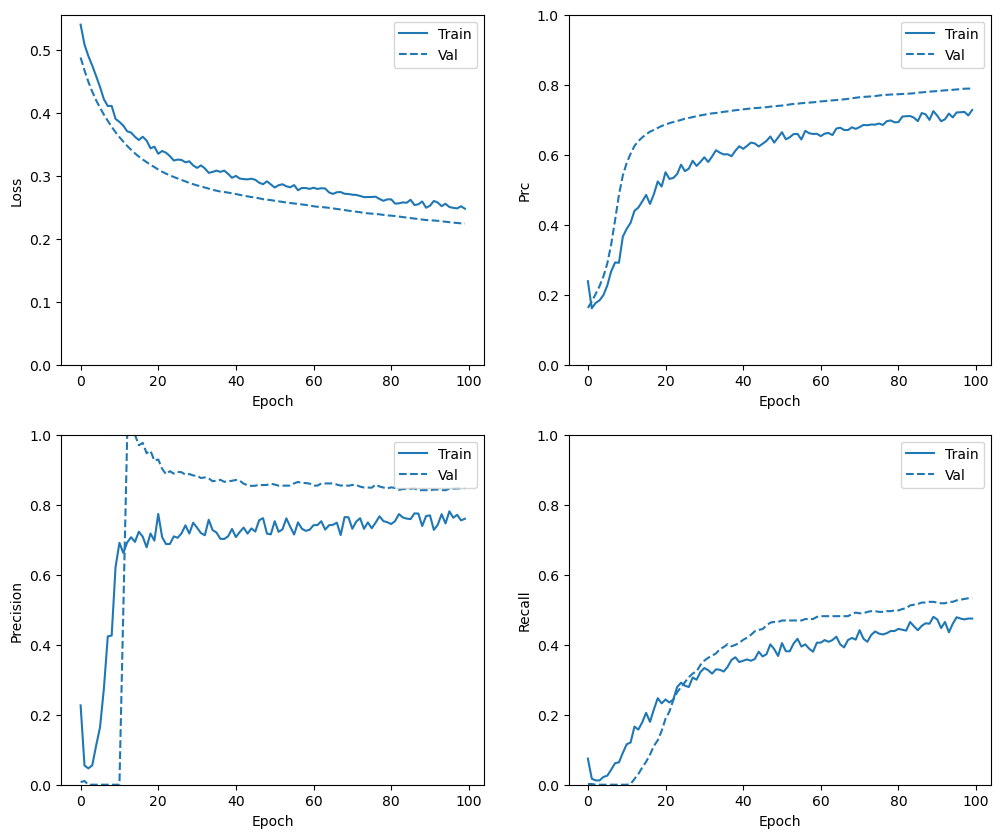

In [50]:
plot_metrics(baseline_history)

In [51]:
train_predictions_baseline = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)

4/4 [==============================] - 0s 723us/step


**Function for plotting confusion matrix and some important statistics.**

In [52]:
def plot_cm(labels, predictions, threshold=0.5):
  cm = confusion_matrix(labels, predictions > threshold)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(threshold))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

  p = cm[1][1]/(cm[1][1] + cm[0][1])
  r = cm[1][1]/(cm[1][1] + cm[1][0])
  print('Recall: ', r)
  print('F1 Score: ', 2*((p*r)/(p+r)))

**See the results of baseline model, i.e., no weighted.**

loss :  0.21933716535568237
cross entropy :  0.21933716535568237
Brier score :  0.06477195769548416
tp :  177.0
fp :  31.0
tn :  1669.0
fn :  149.0
accuracy :  0.9111549854278564
precision :  0.8509615659713745
recall :  0.5429447889328003
auc :  0.9377246499061584
prc :  0.8081866502761841

Legitimate Transactions Detected (True Negatives):  1669
Legitimate Transactions Incorrectly Detected (False Positives):  31
Fraudulent Transactions Missed (False Negatives):  149
Fraudulent Transactions Detected (True Positives):  177
Total Fraudulent Transactions:  326
Recall:  0.5429447852760736
F1 Score:  0.6629213483146066


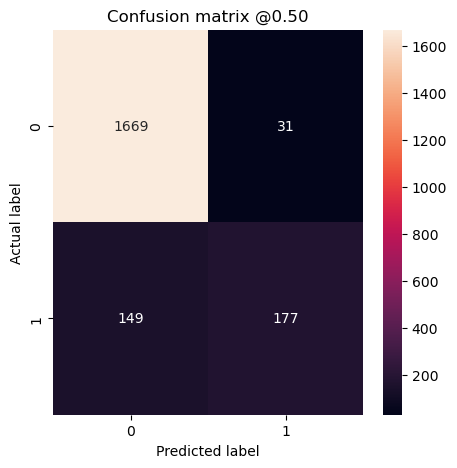

In [53]:
baseline_results = model.evaluate(X_test, y_test,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline)

**Change the threshold for when to mark a customer attritioned.**

Legitimate Transactions Detected (True Negatives):  1627
Legitimate Transactions Incorrectly Detected (False Positives):  73
Fraudulent Transactions Missed (False Negatives):  98
Fraudulent Transactions Detected (True Positives):  228
Total Fraudulent Transactions:  326
Recall:  0.6993865030674846
F1 Score:  0.7272727272727272


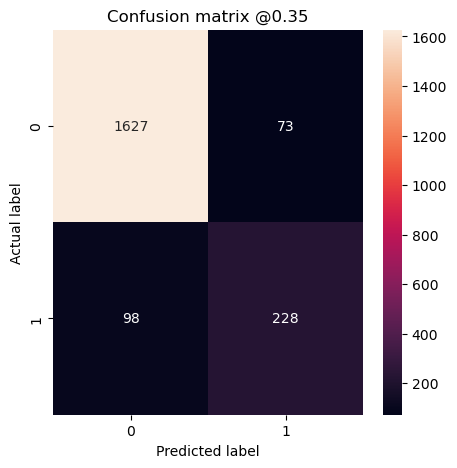

In [54]:
plot_cm(y_test, test_predictions_baseline, threshold=0.35)
#plot_cm(y_test, test_predictions_baseline, threshold=0.9)

## Weighted Model Building

**Build weights for each attrited value.**

In [55]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.60
Weight for class 1: 3.11


In [56]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val, y_val),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 1.0836 - cross entropy: 0.4544 - Brier score: 0.1419 - tp: 192.0000 - fp: 345.0000 - tn: 5605.0000 - fn: 947.0000 - accuracy: 0.8177 - precision: 0.3575 - recall: 0.1686 - auc: 0.6635 - prc: 0.2607 - val_loss: 0.4944 - val_cross entropy: 0.4944 - val_Brier score: 0.1598 - val_tp: 1.0000 - val_fp: 161.0000 - val_tn: 2389.0000 - val_fn: 487.0000 - val_accuracy: 0.7867 - val_precision: 0.0062 - val_recall: 0.0020 - val_auc: 0.5423 - val_prc: 0.1588
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0158 - cross entropy: 0.5227 - Brier score: 0.1658 - tp: 23.0000 - fp: 302.0000 - tn: 3948.0000 - fn: 790.0000 - accuracy: 0.7843 - precision: 0.0708 - recall: 0.0283 - auc: 0.5307 - prc: 0.1598 - val_loss: 0.4811 - val_cross entropy: 0.4811 - val_Brier score: 0.1552 - val_tp: 1.0000 - val_fp: 136.0000 - val_tn: 2414.0000 - val_fn: 487.0000 - val_accuracy: 0.7949 - val_precision: 0.0073 - val_recal

Epoch 17/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6001 - cross entropy: 0.4919 - Brier score: 0.1594 - tp: 424.0000 - fp: 721.0000 - tn: 3529.0000 - fn: 389.0000 - accuracy: 0.7808 - precision: 0.3703 - recall: 0.5215 - auc: 0.7598 - prc: 0.4190 - val_loss: 0.4314 - val_cross entropy: 0.4314 - val_Brier score: 0.1328 - val_tp: 312.0000 - val_fp: 287.0000 - val_tn: 2263.0000 - val_fn: 176.0000 - val_accuracy: 0.8476 - val_precision: 0.5209 - val_recall: 0.6393 - val_auc: 0.8342 - val_prc: 0.6416
Epoch 18/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5875 - cross entropy: 0.4983 - Brier score: 0.1613 - tp: 463.0000 - fp: 789.0000 - tn: 3461.0000 - fn: 350.0000 - accuracy: 0.7750 - precision: 0.3698 - recall: 0.5695 - auc: 0.7680 - prc: 0.4522 - val_loss: 0.4320 - val_cross entropy: 0.4320 - val_Brier score: 0.1334 - val_tp: 320.0000 - val_fp: 322.0000 - val_tn: 2228.0000 - val_fn: 168.0000 - val_accuracy: 0.8387 - val_precision: 0.4984 - val

Epoch 33/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4763 - cross entropy: 0.4478 - Brier score: 0.1405 - tp: 576.0000 - fp: 739.0000 - tn: 3511.0000 - fn: 237.0000 - accuracy: 0.8072 - precision: 0.4380 - recall: 0.7085 - auc: 0.8543 - prc: 0.5941 - val_loss: 0.4056 - val_cross entropy: 0.4056 - val_Brier score: 0.1261 - val_tp: 368.0000 - val_fp: 393.0000 - val_tn: 2157.0000 - val_fn: 120.0000 - val_accuracy: 0.8311 - val_precision: 0.4836 - val_recall: 0.7541 - val_auc: 0.8776 - val_prc: 0.7021
Epoch 34/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4821 - cross entropy: 0.4642 - Brier score: 0.1472 - tp: 575.0000 - fp: 796.0000 - tn: 3454.0000 - fn: 238.0000 - accuracy: 0.7958 - precision: 0.4194 - recall: 0.7073 - auc: 0.8504 - prc: 0.5933 - val_loss: 0.4038 - val_cross entropy: 0.4038 - val_Brier score: 0.1255 - val_tp: 366.0000 - val_fp: 393.0000 - val_tn: 2157.0000 - val_fn: 122.0000 - val_accuracy: 0.8305 - val_precision: 0.4822 - val

Epoch 49/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4476 - cross entropy: 0.4361 - Brier score: 0.1353 - tp: 615.0000 - fp: 719.0000 - tn: 3531.0000 - fn: 198.0000 - accuracy: 0.8189 - precision: 0.4610 - recall: 0.7565 - auc: 0.8744 - prc: 0.6229 - val_loss: 0.3837 - val_cross entropy: 0.3837 - val_Brier score: 0.1186 - val_tp: 371.0000 - val_fp: 377.0000 - val_tn: 2173.0000 - val_fn: 117.0000 - val_accuracy: 0.8374 - val_precision: 0.4960 - val_recall: 0.7602 - val_auc: 0.8945 - val_prc: 0.7172
Epoch 50/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4520 - cross entropy: 0.4384 - Brier score: 0.1368 - tp: 605.0000 - fp: 723.0000 - tn: 3527.0000 - fn: 208.0000 - accuracy: 0.8161 - precision: 0.4556 - recall: 0.7442 - auc: 0.8710 - prc: 0.6147 - val_loss: 0.3810 - val_cross entropy: 0.3810 - val_Brier score: 0.1177 - val_tp: 371.0000 - val_fp: 374.0000 - val_tn: 2176.0000 - val_fn: 117.0000 - val_accuracy: 0.8384 - val_precision: 0.4980 - val

Epoch 65/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4286 - cross entropy: 0.4116 - Brier score: 0.1268 - tp: 611.0000 - fp: 691.0000 - tn: 3559.0000 - fn: 202.0000 - accuracy: 0.8236 - precision: 0.4693 - recall: 0.7515 - auc: 0.8858 - prc: 0.6491 - val_loss: 0.3614 - val_cross entropy: 0.3614 - val_Brier score: 0.1109 - val_tp: 377.0000 - val_fp: 344.0000 - val_tn: 2206.0000 - val_fn: 111.0000 - val_accuracy: 0.8502 - val_precision: 0.5229 - val_recall: 0.7725 - val_auc: 0.9072 - val_prc: 0.7324
Epoch 66/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4280 - cross entropy: 0.4029 - Brier score: 0.1245 - tp: 600.0000 - fp: 641.0000 - tn: 3609.0000 - fn: 213.0000 - accuracy: 0.8313 - precision: 0.4835 - recall: 0.7380 - auc: 0.8868 - prc: 0.6445 - val_loss: 0.3602 - val_cross entropy: 0.3602 - val_Brier score: 0.1105 - val_tp: 376.0000 - val_fp: 344.0000 - val_tn: 2206.0000 - val_fn: 112.0000 - val_accuracy: 0.8499 - val_precision: 0.5222 - val

Epoch 81/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4026 - cross entropy: 0.3947 - Brier score: 0.1205 - tp: 629.0000 - fp: 629.0000 - tn: 3621.0000 - fn: 184.0000 - accuracy: 0.8394 - precision: 0.5000 - recall: 0.7737 - auc: 0.9015 - prc: 0.6647 - val_loss: 0.3464 - val_cross entropy: 0.3464 - val_Brier score: 0.1059 - val_tp: 380.0000 - val_fp: 336.0000 - val_tn: 2214.0000 - val_fn: 108.0000 - val_accuracy: 0.8539 - val_precision: 0.5307 - val_recall: 0.7787 - val_auc: 0.9175 - val_prc: 0.7443
Epoch 82/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4074 - cross entropy: 0.3966 - Brier score: 0.1207 - tp: 635.0000 - fp: 617.0000 - tn: 3633.0000 - fn: 178.0000 - accuracy: 0.8430 - precision: 0.5072 - recall: 0.7811 - auc: 0.8998 - prc: 0.6582 - val_loss: 0.3453 - val_cross entropy: 0.3453 - val_Brier score: 0.1055 - val_tp: 380.0000 - val_fp: 335.0000 - val_tn: 2215.0000 - val_fn: 108.0000 - val_accuracy: 0.8542 - val_precision: 0.5315 - val

Epoch 97/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3877 - cross entropy: 0.3801 - Brier score: 0.1162 - tp: 635.0000 - fp: 609.0000 - tn: 3641.0000 - fn: 178.0000 - accuracy: 0.8446 - precision: 0.5105 - recall: 0.7811 - auc: 0.9088 - prc: 0.6938 - val_loss: 0.3334 - val_cross entropy: 0.3334 - val_Brier score: 0.1016 - val_tp: 382.0000 - val_fp: 325.0000 - val_tn: 2225.0000 - val_fn: 106.0000 - val_accuracy: 0.8581 - val_precision: 0.5403 - val_recall: 0.7828 - val_auc: 0.9249 - val_prc: 0.7550
Epoch 98/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3852 - cross entropy: 0.3832 - Brier score: 0.1155 - tp: 645.0000 - fp: 619.0000 - tn: 3631.0000 - fn: 168.0000 - accuracy: 0.8446 - precision: 0.5103 - recall: 0.7934 - auc: 0.9113 - prc: 0.6828 - val_loss: 0.3324 - val_cross entropy: 0.3324 - val_Brier score: 0.1013 - val_tp: 384.0000 - val_fp: 326.0000 - val_tn: 2224.0000 - val_fn: 104.0000 - val_accuracy: 0.8585 - val_precision: 0.5408 - val

In [57]:
train_predictions_weighted = weighted_model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(X_test, batch_size=BATCH_SIZE)

4/4 [==============================] - 0s 577us/step


loss :  0.3281724452972412
cross entropy :  0.3281724452972412
Brier score :  0.09980381280183792
tp :  268.0
fp :  216.0
tn :  1484.0
fn :  58.0
accuracy :  0.8647581338882446
precision :  0.5537189841270447
recall :  0.8220859169960022
auc :  0.9307560920715332
prc :  0.7763729691505432

Legitimate Transactions Detected (True Negatives):  1484
Legitimate Transactions Incorrectly Detected (False Positives):  216
Fraudulent Transactions Missed (False Negatives):  58
Fraudulent Transactions Detected (True Positives):  268
Total Fraudulent Transactions:  326
Recall:  0.8220858895705522
F1 Score:  0.6617283950617284


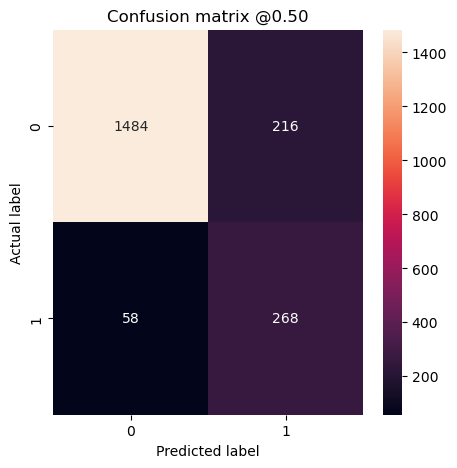

In [58]:
weighted_results = weighted_model.evaluate(X_test, y_test,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_weighted)

Legitimate Transactions Detected (True Negatives):  1341
Legitimate Transactions Incorrectly Detected (False Positives):  359
Fraudulent Transactions Missed (False Negatives):  32
Fraudulent Transactions Detected (True Positives):  294
Total Fraudulent Transactions:  326
Recall:  0.901840490797546
F1 Score:  0.6006128702757916


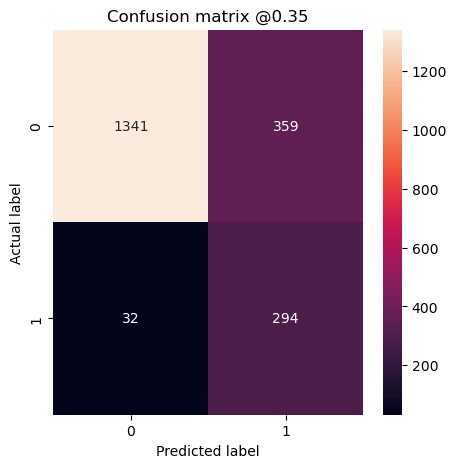

In [59]:
plot_cm(y_test, test_predictions_weighted, threshold=0.35)

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are individuals correctly predicted by the model to leave their credit card services 
- False negatives (FN) are individuals who are predicted NOT to leave their credit card services but indeed will leave.
- False positives (FP) are individuals predicted by the model to leave their credit card services but will not.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of individuals maintain their credit card services.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts an individual will NOT leave when they will leave, the bank will expend more resources to get new customers to replace the customers it failed to identify as at risk. A current customer is always easier to maintain than find a new one.  

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

# Business Insights and Conclusions

I've built a predictive model that can help the company identify customers who are at risk of terminating their credit card services with the bank.  The model, with its feature importance, can be used to identify behaviors that indicate a customer is moving toward terminating service and take the necessary steps to intervene.     

Attrition from credit card services are driven primarily by Total Transaction Count, Total Relationship Count, and Total Revolving Balance.

Total Transaction Count: Customers with more Total Transactions stay customes. This is a strong feature and one that should be the focus of the bank.  They should take steps to incentivize using the credit card, possibly with reward points or some other benefit.  

Total Relationship Count: Customers who have more products with the bank are the ones who stay at the bank.  Again, incentivizing the use of more products is a way to make customers stick to the bank.  

Total Revolving Balance: As might be expected, customers with a revolving balance stay at the bank. Closing a credit card with a balance is more difficult to do. The bank might think of ways to market smaller interest rates if customers agree to pay over several months.  This generates revenue at a reduce profit, but it helps keep customers with the bank.   

Card Category doesn't seem to have an impact on attrition - the cards could be how rewards are categorized and dispensed, but the kind of card does not appear to be helpful at keeping customers.

Marital Status, Income, and Education do NOT appear to be powerfully influential in determining customers who will depart the bank.    

Overall, the bank needs to focus on ways to increase card usage and overall product use at the bank.  Customers stay with banks where more and more services and transactions are occuring regularly.  

***